<a href="https://colab.research.google.com/github/Aarav-H/FM-Assignment/blob/main/regression-notebooks/BPCL_Beta_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

In [ ]:
#Download stock prices for the security monthly data last 5 years
BPCL_df = yf.download('BPCL.NS',
                      start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo'
)
BPCL_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,379.850006,421.700012,348.000000,409.350006,302.780304,160924350
2019-06-01,417.500000,419.899994,373.100006,392.450012,290.279999,95004512
2019-07-01,391.000000,392.850006,328.200012,345.500000,255.552917,98647780
2019-08-01,345.000000,357.850006,308.350006,355.250000,262.764557,76622831
2019-09-01,355.250000,482.049988,342.299988,470.100006,356.036957,310368965


In [ ]:
#Download Market index closing prices
NIFTY_df = yf.download('^NSEI',start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo',
)
NIFTY_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,11725.549805,12041.150391,11108.299805,11922.799805,11922.799805,8645600
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000


In [ ]:
#Calculate Log returns(BPCL)
BPCL_df['Return_BPCL'] = np.log(BPCL_df['Adj Close']/BPCL_df['Adj Close'].shift(1))
print(BPCL_df['Return_BPCL'])

Date
2019-05-01         NaN
2019-06-01   -0.042162
2019-07-01   -0.127416
2019-08-01    0.027829
2019-09-01    0.303776
2019-10-01    0.113496
2019-11-01   -0.028996
2019-12-01   -0.039881
2020-01-01   -0.072990
2020-02-01   -0.069313
2020-03-01   -0.296674
2020-04-01    0.208224
2020-05-01   -0.076356
2020-06-01    0.087109
2020-07-01    0.101127
2020-08-01   -0.014606
2020-09-01   -0.144167
2020-10-01    0.003958
2020-11-01    0.051011
2020-12-01    0.021483
2021-01-01    0.006538
2021-02-01    0.159314
2021-03-01   -0.010874
2021-04-01   -0.002778
2021-05-01    0.112448
2021-06-01   -0.008297
2021-07-01   -0.049485
2021-08-01    0.057040
2021-09-01   -0.087349
2021-10-01    0.039991
2021-11-01   -0.121260
2021-12-01    0.052570
2022-01-01    0.029651
2022-02-01   -0.126701
2022-03-01    0.040337
2022-04-01    0.009003
2022-05-01   -0.105790
2022-06-01   -0.056113
2022-07-01    0.068604
2022-08-01   -0.005008
2022-09-01   -0.057898
2022-10-01   -0.003780
2022-11-01    0.116447
2022-1

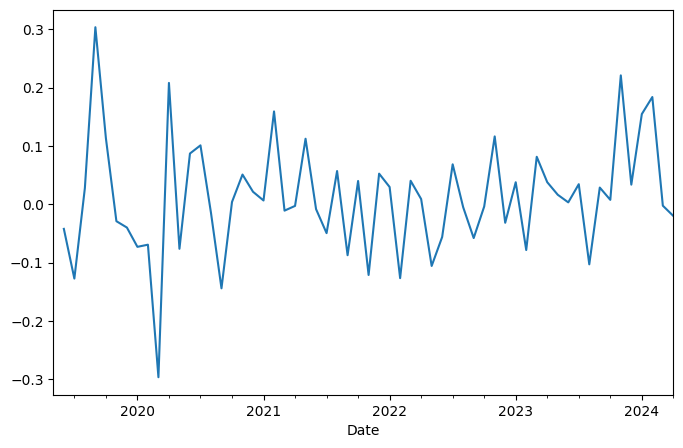

In [ ]:
BPCL_df['Return_BPCL'].plot(figsize=(8,5))
plt.show()

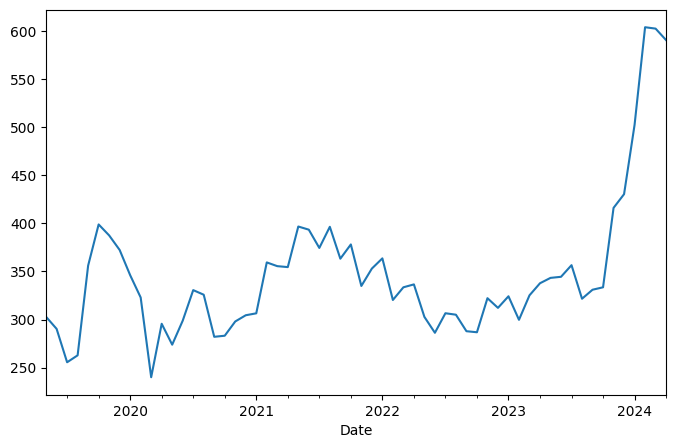

In [ ]:
BPCL_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
BPCL_df1 = BPCL_df.dropna(axis=0)
BPCL_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_BPCL
Date,,,,,,,
2019-06-01,417.50,419.899994,373.100006,392.450012,290.279999,95004512,-0.042162
2019-07-01,391.00,392.850006,328.200012,345.500000,255.552917,98647780,-0.127416
2019-08-01,345.00,357.850006,308.350006,355.250000,262.764557,76622831,0.027829
2019-09-01,355.25,482.049988,342.299988,470.100006,356.036957,310368965,0.303776
2019-10-01,498.00,545.000000,475.450012,526.599976,398.827972,268572360,0.113496


In [ ]:
#Caclulate log returns(NIFTY50)
NIFTY_df['Return_NIFTY'] = np.log(NIFTY_df['Adj Close']/NIFTY_df['Adj Close'].shift(1))
print(NIFTY_df['Return_NIFTY'])

Date
2019-05-01         NaN
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
2019-11-01    0.014925
2019-12-01    0.009280
2020-01-01   -0.017103
2020-02-01   -0.065673
2020-03-01   -0.264569
2020-04-01    0.136976
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
2020-10-01    0.034503
2020-11-01    0.107904
2020-12-01    0.075195
2021-01-01   -0.025142
2021-02-01    0.063546
2021-03-01    0.011058
2021-04-01   -0.004065
2021-05-01    0.063018
2021-06-01    0.008861
2021-07-01    0.002639
2021-08-01    0.083291
2021-09-01    0.027970
2021-10-01    0.003032
2021-11-01   -0.039737
2021-12-01    0.021601
2022-01-01   -0.000819
2022-02-01   -0.031992
2022-03-01    0.039169
2022-04-01   -0.020957
2022-05-01   -0.030756
2022-06-01   -0.049712
2022-07-01    0.083720
2022-08-01    0.034430
2022-09-01   -0.038161
2022-10-01    0.052301
2022-11-01    0.040590
2022-1

In [ ]:
NIFTY_df1 = NIFTY_df.dropna(axis=0)
NIFTY_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000,-0.011298
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500,-0.058589
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100,-0.008559
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000,0.040116
2019-10-01,11515.400391,11945.000000,11090.150391,11877.450195,11877.450195,15461000,0.034519


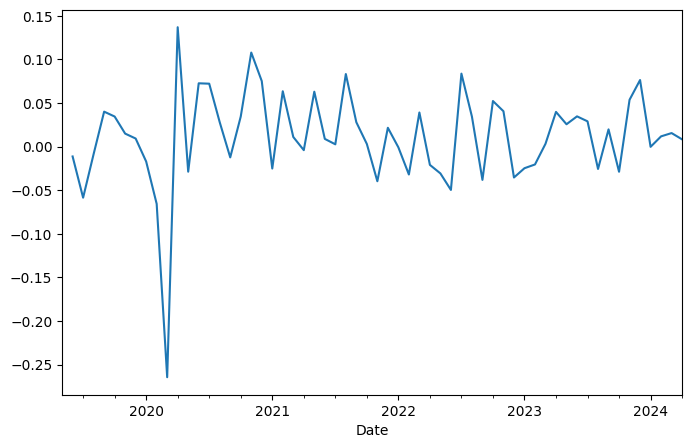

In [ ]:
NIFTY_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

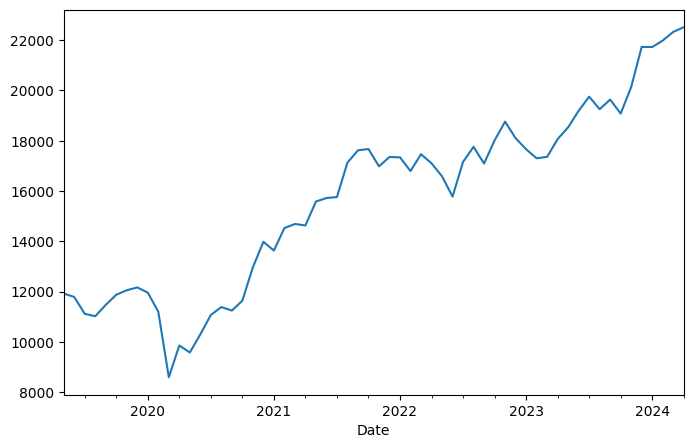

In [ ]:
NIFTY_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
BPCL_df1_returns = BPCL_df1['Return_BPCL']
BPCL_df1_returns.head()


Date
2019-06-01   -0.042162
2019-07-01   -0.127416
2019-08-01    0.027829
2019-09-01    0.303776
2019-10-01    0.113496
Name: Return_BPCL, dtype: float64

In [ ]:
NIFTY_df1_returns = NIFTY_df1['Return_NIFTY']
NIFTY_df1_returns.head()

Date
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
Name: Return_NIFTY, dtype: float64

In [ ]:
returns = pd.merge(NIFTY_df1_returns,BPCL_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_BPCL
count,59.000000,59.000000
mean,0.010774,0.011320
std,0.055822,0.099244
min,-0.264569,-0.296674
25%,-0.020723,-0.045823
50%,0.011058,0.006538
75%,0.039495,0.051791
max,0.136976,0.303776


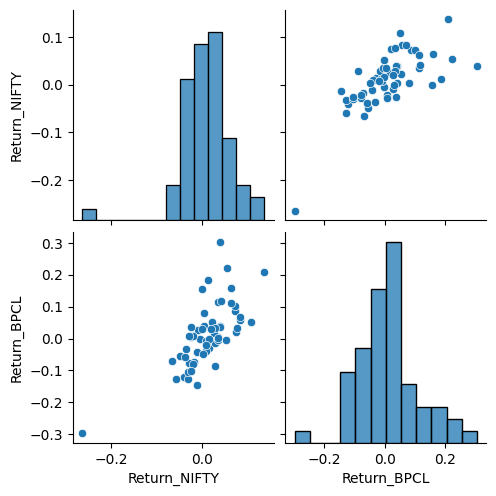

In [ ]:
sns.pairplot(returns)
plt.show()

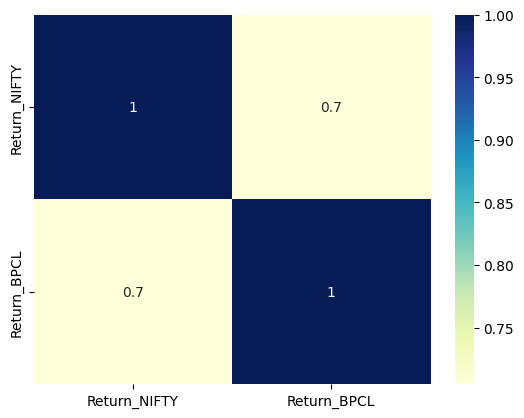

In [ ]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_BPCL']
x_sm = sm.add_constant(x)

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [ ]:
#Regression - Market model
model = sm.OLS(y,x_sm)

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
results = model.fit()

In [ ]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_BPCL   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     56.24
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           4.68e-10
Time:                        18:38:51   Log-Likelihood:                 73.337
No. Observations:                  59   AIC:                            -142.7
Df Residuals:                      57   BIC:                            -138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0022      0.009     -0.231      0.818      -0.021       0.017
Return_NIFTY     1.2529      0.167      7.499      0.000       0.918       1.587
==============================================================================
Omnibus:                       18.862   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.892
Skew:                           1.200   Prob(JB):                     2.39e-06
Kurtosis:                       5.184   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Beta for Infosys stock = 0.679 and significant at 5%


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-06-01 to 2024-04-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  59 non-null     float64
 1   Return_BPCL   59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


<Axes: xlabel='Return_NIFTY', ylabel='Return_BPCL'>

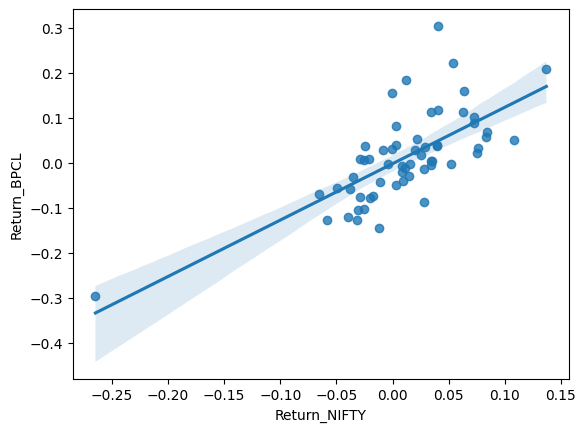

In [ ]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_BPCL', data = returns)

In [ ]:
print('resid', results.resid)

resid Date
2019-06-01   -0.025827
2019-07-01   -0.051832
2019-08-01    0.040731
2019-09-01    0.255694
2019-10-01    0.072426
2019-11-01   -0.045516
2019-12-01   -0.049329
2020-01-01   -0.049382
2020-02-01    0.015147
2020-03-01    0.036982
2020-04-01    0.038787
2020-05-01   -0.038135
2020-06-01   -0.001721
2020-07-01    0.012843
2020-08-01   -0.047465
2020-09-01   -0.126495
2020-10-01   -0.037092
2020-11-01   -0.082003
2020-12-01   -0.070549
2021-01-01    0.040218
2021-02-01    0.081876
2021-03-01   -0.022549
2021-04-01    0.004495
2021-05-01    0.035671
2021-06-01   -0.017221
2021-07-01   -0.050613
2021-08-01   -0.045136
2021-09-01   -0.120213
2021-10-01    0.038371
2021-11-01   -0.069295
2021-12-01    0.027685
2022-01-01    0.032855
2022-02-01   -0.084440
2022-03-01   -0.006559
2022-04-01    0.037439
2022-05-01   -0.065077
2022-06-01    0.008350
2022-07-01   -0.034110
2022-08-01   -0.045967
2022-09-01   -0.007907
2022-10-01   -0.067129
2022-11-01    0.067771
2022-12-01    0.014859


<ipython-input-27-a89ebdceef41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid)


count    5.900000e+01
mean     6.468460e-19
std      7.041203e-02
min     -1.264952e-01
25%     -4.839742e-02
50%     -9.812252e-03
75%      3.721049e-02
max      2.556937e-01
dtype: float64

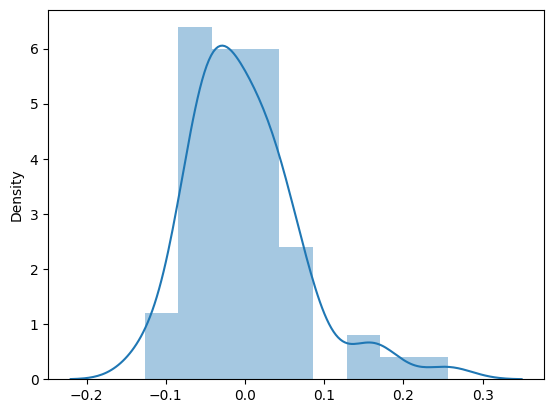

In [ ]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 0.5555125236874322, 'Test Statistic p-value': 0.757481426142053, 'F-Statistic': 0.2661388838348898, 'F-Test p-value': 0.7672964686637895}


#The errors are homoskedastic as per the White test


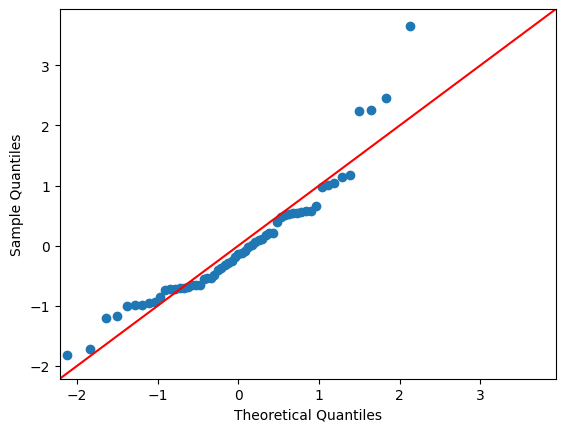

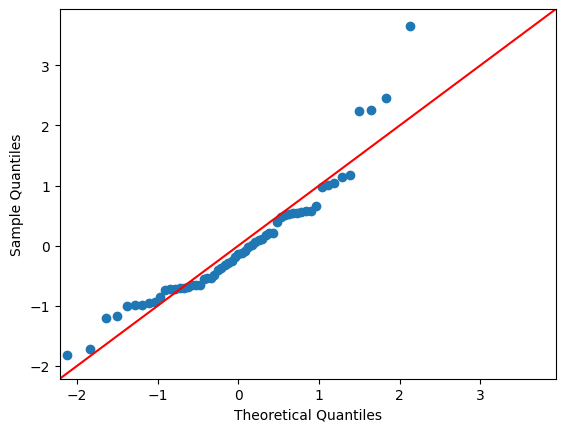

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [ ]:
stats.normaltest(results.resid)

NormaltestResult(statistic=11.089948934958652, pvalue=0.003907042959380709)

We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line.
The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.